## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing
### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 35406 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x, y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[119.25 108.25 102.25]
   [120.25 109.25 103.25]
   [119.5  108.5  102.5 ]
   ...
   [155.   146.   141.  ]
   [146.5  137.5  132.5 ]
   [151.   142.   137.  ]]

  [[114.5  103.5   97.5 ]
   [116.75 105.75  99.75]
   [118.5  107.5  101.5 ]
   ...
   [155.5  146.5  141.5 ]
   [148.5  139.5  134.5 ]
   [151.   142.   137.  ]]

  [[116.75 105.75  99.75]
   [120.   109.   103.  ]
   [118.25 107.25 101.25]
   ...
   [148.   139.   134.  ]
   [144.75 135.75 130.75]
   [153.   144.   139.  ]]

  ...

  [[131.   123.   120.  ]
   [139.5  131.5  128.5 ]
   [132.25 124.25 121.25]
   ...
   [155.75 150.75 147.75]
   [153.5  148.5  145.5 ]
   [157.   152.   149.  ]]

  [[130.25 122.25 119.25]
   [136.75 128.75 125.75]
   [128.25 120.25 117.25]
   ...
   [150.25 145.25 142.25]
   [153.5  148.5  145.5 ]
   [152.75 147.75 144.75]]

  [[132.5  124.5  121.5 ]
   [126.75 118.75 115.75]
   [123.5  115.5  112.5 ]
   ...
   [154.5  149.5  146.5 ]
   [151.5  146.5  143.5 ]
   [154.5  149.5  14

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be a chance of Underfitting, so increase number of neurons
3. Add more Convolution layers to extract more features from images. There may be a possibility that the model is unable to capture relevant features or the model is getting confused due to lack of features so feed with more features.

## Building Model

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
# Building Convolution Layer

In [9]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

c:\Users\JASNEET ARORA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [14]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500, activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
# Output Layer
model.add(Dense(units=38, activation='softmax'))

## Compiling Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [21]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=5)

Epoch 1/5
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 671s 603ms/step - accuracy: 0.2661 - loss: 2.6644 - val_accuracy: 0.7502 - val_loss: 0.8504
Epoch 2/5
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 699s 632ms/step - accuracy: 0.7343 - loss: 0.8691 - val_accuracy: 0.8155 - val_loss: 0.5941
Epoch 3/5
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 829s 749ms/step - accuracy: 0.8413 - loss: 0.5065 - val_accuracy: 0.8740 - val_loss: 0.3902
Epoch 4/5
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 655s 592ms/step - accuracy: 0.8936 - loss: 0.3330 - val_accuracy: 0.8929 - val_loss: 0.3308
Epoch 5/5
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 633s 572ms/step - accuracy: 0.9166 - loss: 0.2544 - val_accuracy: 0.9128 - val_loss: 0.2738


### Model Evaluation

In [22]:
# Model Evaluation on Training set
train_loss, train_acc = model.evaluate(training_set)

1107/1107 ━━━━━━━━━━━━━━━━━━━━ 129s 117ms/step - accuracy: 0.9589 - loss: 0.1239


In [23]:
print(train_loss, train_acc)

0.10647707432508469 0.9650059342384338


In [24]:
# Model on Validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 65s 119ms/step - accuracy: 0.9139 - loss: 0.2764


In [25]:
print(val_loss, val_acc)

0.27359139919281006 0.9127589464187622


### Saving Model

In [26]:
model.save("trained_model.keras")

In [27]:
training_history.history

{'accuracy': [0.45240920782089233,
  0.766875684261322,
  0.8582161068916321,
  0.9006947875022888,
  0.9221318364143372],
 'loss': [1.8955435752868652,
  0.7511731386184692,
  0.45181459188461304,
  0.3049567639827728,
  0.23638692498207092],
 'val_accuracy': [0.7502276301383972,
  0.8155019283294678,
  0.8740041255950928,
  0.8928977847099304,
  0.9127589464187622],
 'val_loss': [0.8503806591033936,
  0.5941414833068848,
  0.3901916444301605,
  0.33081144094467163,
  0.2737553119659424]}

### Recording History in json

In [28]:
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

In [29]:
training_history.history['accuracy']

[0.45240920782089233,
 0.766875684261322,
 0.8582161068916321,
 0.9006947875022888,
 0.9221318364143372]

### Accuracy Visualization

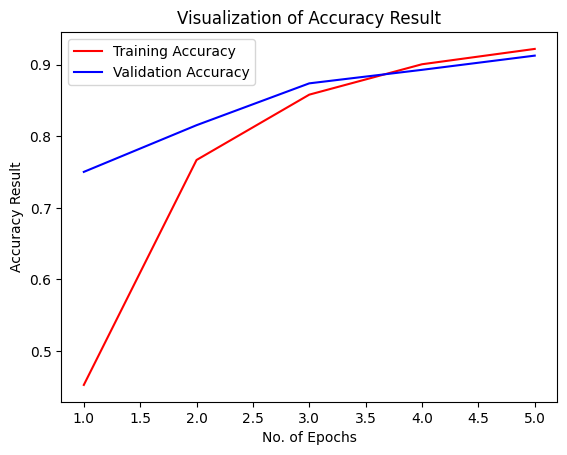

In [30]:
epochs = [i for i in range(1, 6)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Other Metrics for Model Evaluation

In [31]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [32]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [33]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 64s 115ms/step


(array([[9.9995458e-01, 2.7045801e-06, 3.8923861e-08, ..., 1.0991387e-11,
         6.5818102e-12, 4.6173568e-10],
        [9.9707615e-01, 1.2797180e-06, 2.2953489e-07, ..., 1.3868605e-09,
         9.9975672e-10, 4.4211344e-08],
        [9.9999297e-01, 4.6572801e-08, 1.6850467e-07, ..., 3.4659573e-12,
         9.8403360e-12, 2.2256762e-08],
        ...,
        [2.0668483e-06, 1.2599684e-09, 4.7210840e-08, ..., 5.4952283e-09,
         1.1621665e-08, 9.9995089e-01],
        [2.5631109e-05, 3.1248259e-08, 8.7439258e-07, ..., 9.2582972e-08,
         7.6089016e-08, 9.9959117e-01],
        [1.2553837e-11, 1.5526096e-11, 1.9958605e-12, ..., 1.1451501e-11,
         2.6539473e-09, 9.9993837e-01]], dtype=float32),
 (17572, 38))

In [34]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [35]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [36]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [37]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.80      0.87       504
                                 Apple___Black_rot       0.96      0.96      0.96       497
                          Apple___Cedar_apple_rust       0.95      0.93      0.94       440
                                   Apple___healthy       0.90      0.91      0.91       502
                               Blueberry___healthy       0.93      0.92      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.92      0.95       421
                 Cherry_(including_sour)___healthy       0.93      0.95      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.84      0.88       410
                       Corn_(maize)___Common_rust_       0.97      0.98      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.87      0.96      0.

In [40]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[404,   7,   3, ...,   0,   0,   0],
       [  1, 475,   0, ...,   0,   0,   0],
       [  0,   0, 411, ...,   1,   0,   2],
       ...,
       [  0,   0,   3, ..., 466,   0,   0],
       [  0,   0,   0, ...,   0, 432,   0],
       [  2,   0,   0, ...,   0,   0, 466]], dtype=int64)

### Confusion Matrix Visualization

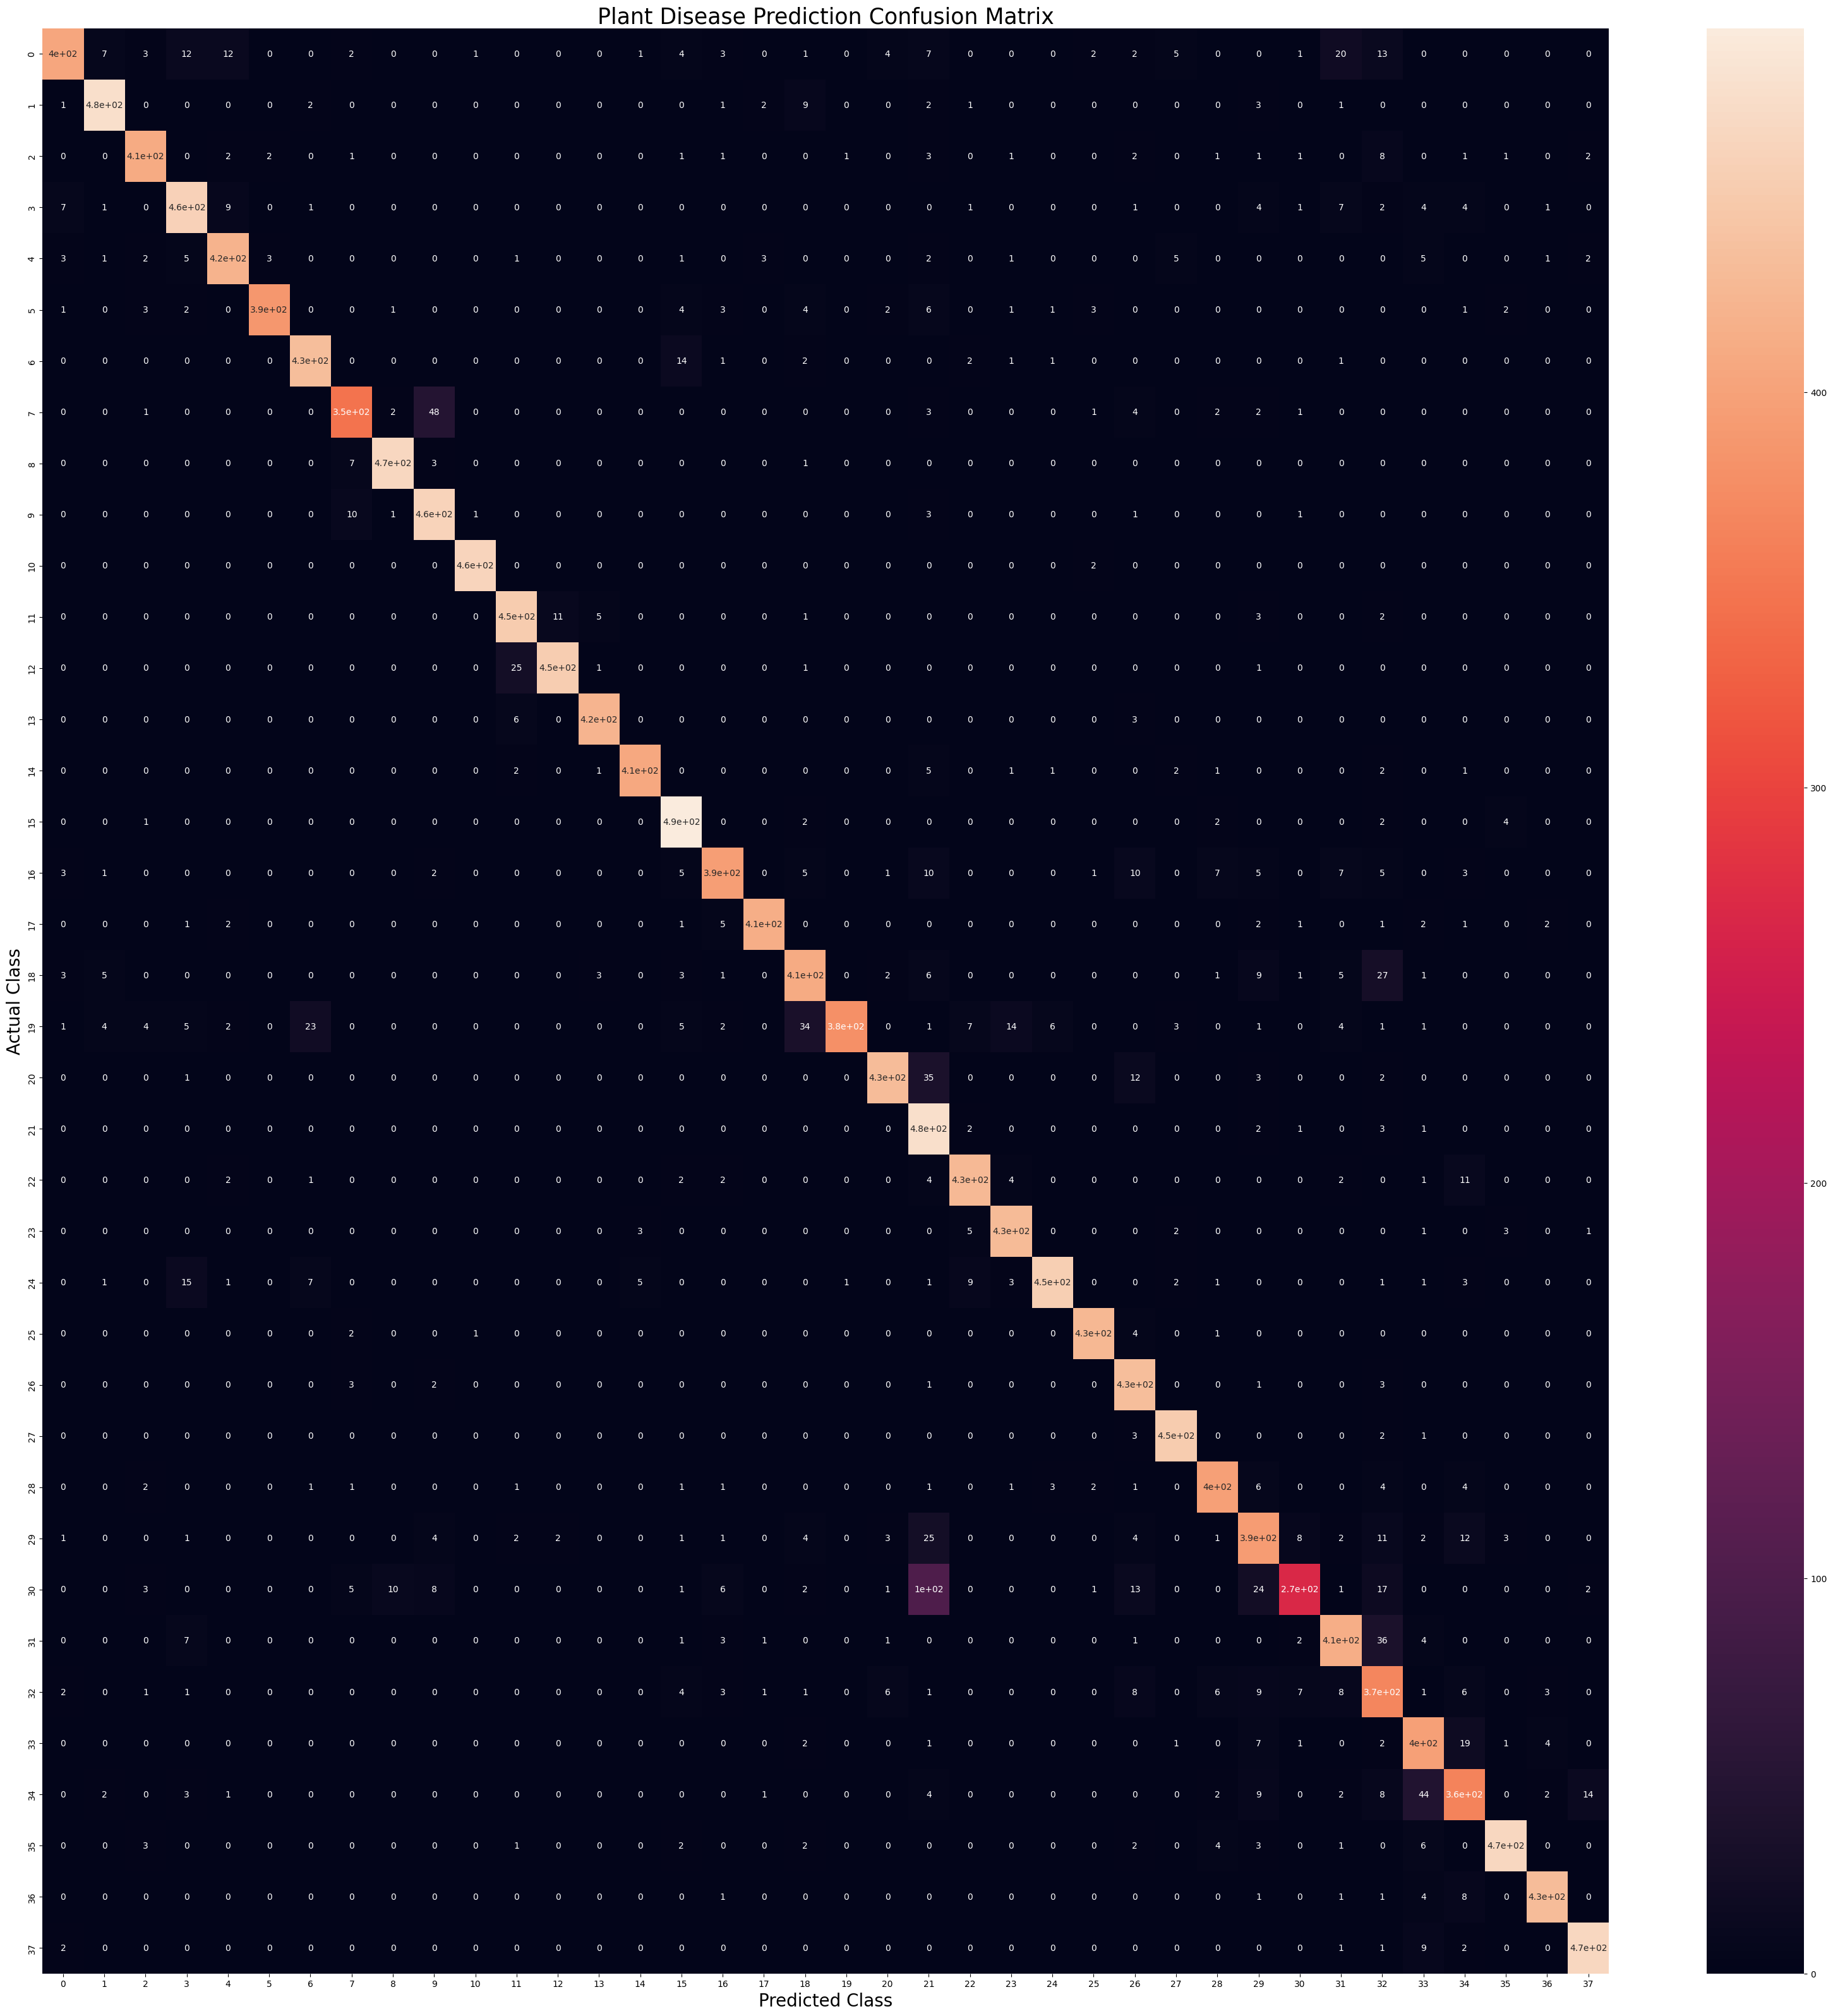

In [41]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.show()

In [1]:
cm

NameError: name 'cm' is not defined

In [2]:
training_set

NameError: name 'training_set' is not defined